In [1]:
import numpy as np
from scripts.helpers import load_csv_data

np.random.seed(1)

In [3]:
train_fname = "data/train.csv"
test_fname = "data/test.csv"

y_train, X_train, ids_train = load_csv_data(train_fname)
y_test, X_test, ids_test = load_csv_data(test_fname)

print(X_train.shape, y_train.shape, ids_train.shape)
print(X_test.shape, y_test.shape, ids_test.shape)

(250000, 30) (250000,) (250000,)
(568238, 30) (568238,) (568238,)


Number of train subsets: 8
Number of test subsets:  8

Train shape:  (73790, 18)   Test shape: (168195, 18)


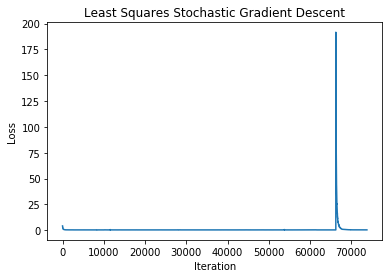

Number of samples:                      168195
Number of correctly classified samples: 78249
Train shape:  (26123, 17)   Test shape:  (59263, 17)


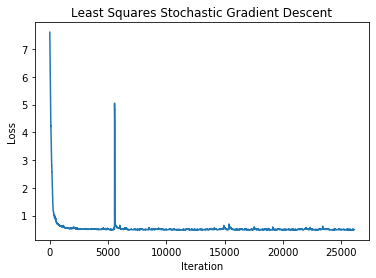

Number of samples:                      59263
Number of correctly classified samples: 27543
Train shape:  (69982, 22)   Test shape: (158095, 22)


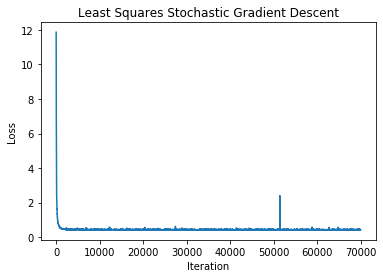

Number of samples:                      158095
Number of correctly classified samples: 85238
Train shape:   (7562, 21)   Test shape:  (17243, 21)


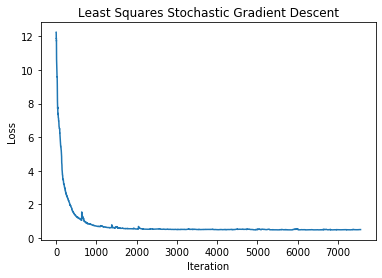

Number of samples:                      17243
Number of correctly classified samples: 7432
Train shape:  (47427, 29)   Test shape: (107905, 29)


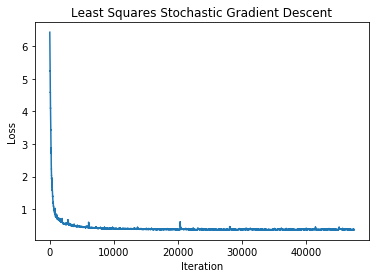

Number of samples:                      107905
Number of correctly classified samples: 52831
Train shape:   (2952, 28)   Test shape:   (6743, 28)


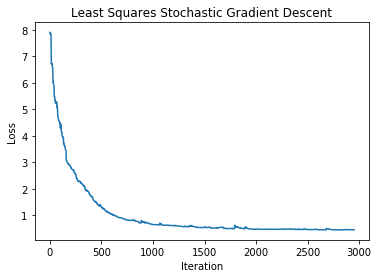

Number of samples:                      6743
Number of correctly classified samples: 2813
Train shape:  (20687, 29)   Test shape:  (47555, 29)


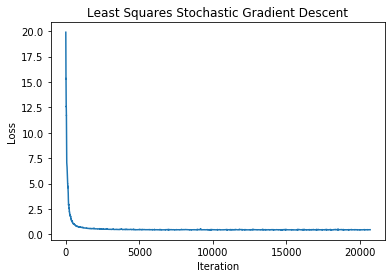

Number of samples:                      47555
Number of correctly classified samples: 24861
Train shape:   (1477, 28)   Test shape:   (3239, 28)


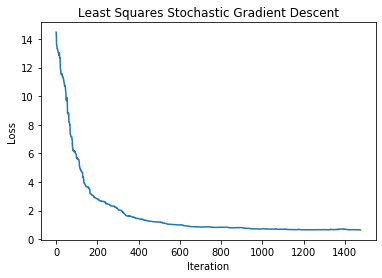

Number of samples:                      3239
Number of correctly classified samples: 1498


In [19]:
from preprocessing import PRI_jet_num_split
from preprocessing import standardize, minmax_normalize
from preprocessing import clean_nan
from implementations import least_squares_SGD
from scripts.helpers import predict_labels
%matplotlib inline

combine_vals = False

train_subsets = PRI_jet_num_split(y_train, X_train, ids_train, combine_vals)
test_subsets = PRI_jet_num_split(y_test, X_test, ids_test, combine_vals)

print(f"Number of train subsets: { len(train_subsets) }")
print(f"Number of test subsets:  { len(test_subsets) }")
print()

assert len(train_subsets) == len(test_subsets)

num_subsets = len(train_subsets)

ids = []
y_pred = []

for i in range(num_subsets):
    y_train_subset, X_train_subset, ids_train_subset = train_subsets[i]
    y_test_subset, X_test_subset, ids_test_subset = test_subsets[i]
    
    X_train_subset, X_test_subset = standardize(X_train_subset, X_test_subset)

    N, D = X_train_subset.shape

    initial_w = np.random.randn(D)
    gamma = 0.003
    
    print(f"Train shape: {str(X_train_subset.shape):>12}   Test shape: {str(X_test_subset.shape):>12}")
    
    loss, w = least_squares_SGD(y_train_subset, X_train_subset, initial_w, 1, N, gamma)
    labels = predict_labels(w, X_test_subset)

    print(f"Number of samples:                      { len(labels) }")
    print(f"Number of correctly classified samples: { np.sum(labels - y_test_subset == 0) }")
    
    ids.extend(ids_test_subset)
    y_pred.extend(labels)

## The following cells are experimental ... **REMOVE LATER**

In [4]:
import pandas as pd
from preprocessing import PRI_jet_num_features


df_train = pd.read_csv("data/train.csv", na_values=-999).drop(columns=["Prediction", "Id"])
df_test = pd.read_csv("data/test.csv", na_values=-999).drop(columns=["Prediction", "Id"])

def generate_datasets(df):
    dfs = []
    
    for group, df_group in df.groupby("PRI_jet_num"):
        valid_columns = df_group.columns[df_group.isna().sum() != df_group.shape[0]]

        df_group_cpy = df_group.loc[:, valid_columns].drop(columns="PRI_jet_num")

        na_mass = df_group_cpy.DER_mass_MMC.isna()

        dfs.append(df_group_cpy.loc[~na_mass, :])
        dfs.append(df_group_cpy.loc[na_mass, :].drop(columns="DER_mass_MMC"))
        
    return dfs

df_train = generate_datasets(df_train)
df_test = generate_datasets(df_test)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(df_train[0])

sc.transform(df_train[0])

array([[ 0.44903335,  1.09444079, -0.1438603 , ...,  0.04271563,
        -0.85327386,  0.        ],
       [ 1.06660202, -1.11511146,  1.38815919, ..., -0.47076088,
        -1.47655602,  0.        ],
       [-0.29127996,  0.03738266,  0.4263165 , ...,  0.02286047,
        -0.02537285,  0.        ],
       ...,
       [ 0.84333507, -1.641962  ,  0.84705157, ..., -0.76583063,
         1.60283374,  0.        ],
       [ 0.13824901,  1.14404284,  0.3988686 , ...,  1.48442089,
        -0.20487569,  0.        ],
       [-0.49694295, -1.0312881 , -0.48890743, ...,  0.45691634,
        -0.34875808,  0.        ]])

In [6]:
from preprocessing import standardize, minmax_normalize

tr, ts = standardize(df_train[0].values, df_test[0].values)
tr

/home/korunosk/EPFL/Courses/Fall 2019/Machine Learning/Projects/Project 1/preprocessing.py:295: RuntimeWarning: invalid value encountered in true_divide
  X_train_cpy = X_train_cpy / std
/home/korunosk/EPFL/Courses/Fall 2019/Machine Learning/Projects/Project 1/preprocessing.py:296: RuntimeWarning: invalid value encountered in true_divide
  X_test_cpy = X_test_cpy / std


array([[ 0.44903335,  1.09444079, -0.1438603 , ...,  0.04271563,
        -0.85327386,         nan],
       [ 1.06660202, -1.11511146,  1.38815919, ..., -0.47076088,
        -1.47655602,         nan],
       [-0.29127996,  0.03738266,  0.4263165 , ...,  0.02286047,
        -0.02537285,         nan],
       ...,
       [ 0.84333507, -1.641962  ,  0.84705157, ..., -0.76583063,
         1.60283374,         nan],
       [ 0.13824901,  1.14404284,  0.3988686 , ...,  1.48442089,
        -0.20487569,         nan],
       [-0.49694295, -1.0312881 , -0.48890743, ...,  0.45691634,
        -0.34875808,         nan]])